# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc
from sklearn.tree._tree import TREE_LEAF, TREE_UNDEFINED

# Importing The Dataset

In [2]:
df = pd.read_csv('data_1.csv')

# Splitting the dataset

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Visualising Decision Surface Boundaries

In [4]:
cols = df.columns[:-1]
cols

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [5]:
pairs = []
n_features = 4
for i in range(0,n_features):
  for j in range(i+1,n_features):
    pairs.append([i,j])

pairs

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

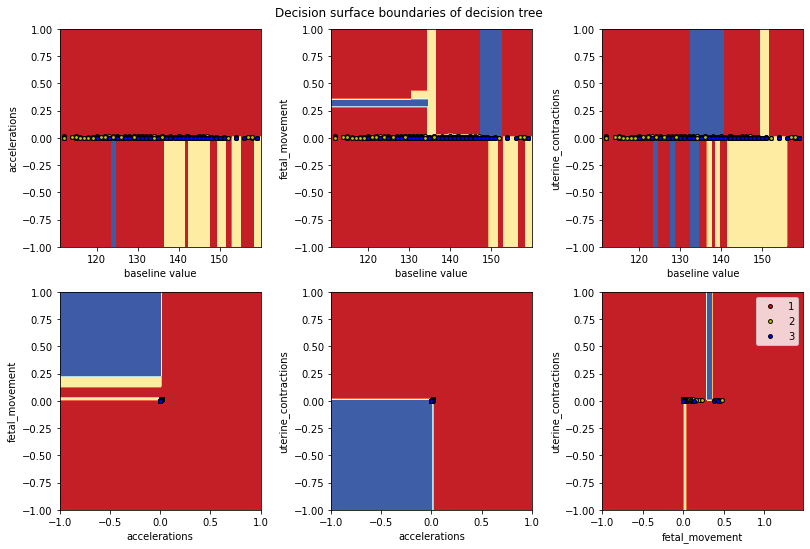

In [6]:
classes = [1,2,3]
plt.figure(figsize=(12,8))

for pair_idx, pair in enumerate(pairs):
    X_ = X[:,pair]

    decision_tree = DecisionTreeClassifier(random_state=0,criterion='entropy',ccp_alpha=0.0015832686794042922).fit(X_, y)

    plt.subplot(2, 3, pair_idx + 1)

    X_min, X_max = X_[:,0].min() -1, X_[:,0].max() + 1
    y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1

    xx, yy = np.meshgrid(np.arange(X_min,X_max,0.02),np.arange(y_min,y_max,0.02))
    plt.tight_layout(h_pad=1, w_pad=1, pad=3)

    Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
    plt.xlabel(cols[pair[0]])
    plt.ylabel(cols[pair[1]])

    for i, color in zip(range(len(classes)), "ryb"):
      val = np.where(y == i)
      plt.scatter(X_[val, 0], X[val, 1],label=classes[i],s=15,edgecolor='black',cmap=plt.cm.RdYlBu,c=color)

plt.suptitle("Decision surface boundaries of decision tree")
plt.legend()
plt.axis("tight")
plt.show()

# Distance of Sample to Nearest Decision Boundary

In [7]:
from copy import deepcopy
def is_leaf(tree,index):
  return tree.children_right[index]==TREE_LEAF and tree.children_left[index]==TREE_LEAF

inf = 10**9

def min_distance_boundary(tree, index, sample, original_sample, predicted_ans):
  if(is_leaf(tree,index)):
    curr_ans = decision_tree.predict([sample])[0]
    if(curr_ans != predicted_ans): 
      return np.linalg.norm(sample - original_sample,ord = 2) #the sample is updated one and not the original passed as parameter 
    else: 
      return inf

  dist = inf #minimum distance to boundary from this sample.
  curr_feature = tree.feature[index]
  increase = 0.01
  new_sample = deepcopy(sample)

  #left subtree
  if(sample[curr_feature] <= tree.threshold[index]):
    dist = min(dist,min_distance_boundary(tree, tree.children_left[index], sample, original_sample, predicted_ans))
    new_sample[curr_feature] = tree.threshold[index] + increase
    dist = min(dist,min_distance_boundary(tree, tree.children_right[index], new_sample, original_sample, predicted_ans))

  #right subtree
  else: 
    dist = min(dist,min_distance_boundary(tree, tree.children_right[index], sample, original_sample, predicted_ans))
    new_sample[curr_feature] = tree.threshold[index]
    dist = min(dist,min_distance_boundary(tree, tree.children_right[index], new_sample, original_sample, predicted_ans))
  
  return dist #minimum dist of boundary from update sample.

In [8]:
decision_tree = DecisionTreeClassifier(random_state=0,criterion='entropy',ccp_alpha=0.0015832686794042922).fit(X,y)

for sample in X:
  min_dist = min_distance_boundary(decision_tree.tree_, 0, sample, sample, decision_tree.predict([sample])[0])
  print(min_dist)

2.6600204375035106
0.010500000023748726
0.010500000023748726
0.010500000023748726
11.51111680761027
10.727339179261243
5.1599997138977045
4.359999713897706
2.1600252345837685
8.63410085431068
5.259999713897705
19.571416204506015
0.010500000023748726
0.010500000023748726
0.010500000023748726
0.010500000023748726
0.010500000023748726
0.6600832313773397
9.000006124997944
0.010500000023748726
0.010500000023748726
3.00001837494381
0.6600832313773397
12.53952988584119
0.010500000023748726
12.769506646695469
14.725494898304767
0.010500000023748726
0.010500000023748726
0.010500000023748726
0.010500000023748726
14.000003937499464
0.010500000023748726
0.2602116469864228
0.5099999999999998
3.821038111560996
2.929220416766487
6.8600077496076555
4.315112976504785
6.53300849532587
9.62142450027966
1.8600293507630585
0.010500000023748726
3.549694669968338
0.010500000039115548
2.7600196866536852
2.7600196866536852
0.5101296403872634
0.011500000071246177
7.510003745005663
5.51000274500833
5.51000274500